This notebook is made for "Data Analysis for Genomics Workshop" (DAGWS). 
Tran Bich Ngoc CAO, ENS Paris, August 2020.
<a rel="license" href="https://creativecommons.org/licenses/by/2.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /> This work is protected by the term of <a rel="license" href="https://creativecommons.org/licenses/by/2.0/"> Attribution 2.0 Generic (CC BY 2.0) </a>. Please cite the source in case of re-distribution.

# Unsupervised Learning: Exploratory Analysis

  `Visualization` + `Finding patterns` + `Predicting on Unlabelled data`

▶ In the supervised methods, we observe both a set of features/variables (e.g. gene expression) for each object, as well as a response or outcome variable (e.g. metastasis information or survival information of the patients). 

▶ The goal is then to predict the response using the variables (e.g. which genes predict best or are associated with the survival of the patients). 

▶ Here we instead focus on exploratory analysis, we are not interested (yet) in prediction. 

▶ We will study two methods:

• principal component analysis, a tool used for data visualization or data pre- processing before supervised techniques are applied; 

• clustering, a broad class of methods for discovering unknown subgroups in data. 

Source data: https://archive.ics.uci.edu/ml/datasets/HCV+data# from paper: **Using machine learning techniques to generate laboratory diagnostic pathways—a case study**

In [4]:
import pandas as pd
data = pd.read_csv("data/hcvdat.csv",delimiter=",")
data.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
# metadata: patient's age, sex....

In [6]:
data = data.drop("Unnamed: 0", axis=1)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


#### Biochemical tests
In the paper:
`The following six traditional diagnostic tests for liver diseases were measured on a Modular P800 automatic analyzer (Roche Diagnostics): albumin (ALB), bilirubin (BIL), choline esterase (CHE), γ-glutamyl-transferase (GGT), aspartate amino-transferase (AST), and alanine amino-transferase (ALT). The concentrations of tissue inhibitor of metalloproteinase 1 (TIMP1), N-terminal peptide of procollagen III (PIIINP), and hyaluronic acid (HA) were measured on the immunochemical analyzer ADVIA Centaur CP (Siemens). The ELF score was calculated directly by the instrument employing the following equation...`

#### Metadata:
73 patients (52 males, 21 females), aged 19 to 75 years (median 50), with a proven serological and histopathological diagnosis of hepatitis C. The morphological pictures ranged from chronic hepatitis C infection without fibrosis to end stage liver cirrhosis with a need for liver transplantation

In [7]:
# create a dictionary store meaning of column names (parameters that are measured during the study)

In [14]:
dict_para = {"ALB" : "albumin", "ALP": "Alkaline phosphatase", "ALT":"alanine amino-transferase", "AST" : "aspartate amino-transferase",
            "BIL" : "bilirubin", "CHE" : "choline esterase", "CHOL" : "Cholesterol", "CREA" : "creatin", 
            "GGT" : "γ-glutamyl-transferase", "PROT" : ["inhibitor of metalloproteinase 1 (TIMP1)","N-terminal peptide of procollagen III (PIIINP)","hyaluronic acid (HA)"]}

In [9]:
# Again, let's explore our data:

In [10]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [11]:
data.Sex.value_counts()

m    377
f    238
Name: Sex, dtype: int64

In [12]:
data.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [13]:
data.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [11]:
data.index = data.iloc[:,0]

In [12]:
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,,,
0=Blood Donor,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
0=Blood Donor,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
0=Blood Donor,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
0=Blood Donor,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
0=Blood Donor,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3=Cirrhosis,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
3=Cirrhosis,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
3=Cirrhosis,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0


Camel vs dromedary?
<img src="fig/camel.png" width=300>

## Dimension reduction 
                                        an example with PCA (principle component analysis)

The first and foremost thing to do is to scale the data, bringing all features to have mean 0 and standard deviation 1 is a standard way. We will learn deeper about scaling in the next lesson. For today, the code is already given for you. Principle component analysis explaination was given in the course "Biostatistics for Dummies", if you didn't attend the course, refer to our slides.

    - Why dimension reduction?

Import necessary modules. We will use pearsonr from scipy.stats to calculate correlation without using R :) Python is very powerful thanks to scipy, Numpy, sklearn and more!

In [13]:
# Check if we have missing data

In [29]:
data.isnull().sum() # If the data has NaN (missing)

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [30]:
# For now, we just drop those values, you will learn about imputing these values in the last session!

In [31]:
# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(data.shape))

# Drop missing values and print shape of new DataFrame
data_drop = data.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(data_drop.shape))



Shape of Original DataFrame: (615, 13)
Shape of DataFrame After Dropping All Rows with Missing Values: (589, 13)


In [32]:
data_drop

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [33]:
# Calling the model

In [34]:
# Import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
import scipy.stats as stats

In [37]:
# Create scaler: scaler
scaler = StandardScaler() # Instantiate a scaler # Instance
data_rescaled = scaler.fit_transform(data_drop.iloc[:,3:])

In [38]:
data_rescaled

array([[-0.54270146, -0.60323005, -0.90549379, ...,  0.48033581,
        -0.48102205, -0.54078756],
       [-0.54270146,  0.08405364, -0.41138002, ..., -0.15140186,
        -0.4165134 ,  0.86256616],
       [ 0.91641697,  0.25394399,  0.46171419, ...,  0.08549977,
        -0.09212705,  1.38648489],
       ...,
       [-1.6717812 , 13.45519639, -0.99184376, ..., -0.51267684,
        11.29272798, -0.63434447],
       [-3.0614178 ,  1.33892554, -1.13576039, ..., -0.36856168,
        -0.04236324, -0.11042575],
       [-2.19289492,  0.74044817, -1.10697707, ..., -0.29551702,
         0.47923527,  1.89169223]])

-  Now instantiate a PCA() instance with name `model` without specifying number of components, then apply fit to the scaled data

In [39]:
# Create PCA instance: model
model = PCA()

# Apply the fit method of model to data_rescaled: pca_features
pca = model.fit(data_rescaled) # .fit_transform will do the actual transform 

As you can see, we are just transforming our high dimensional dataset into a 2D visualization of 2 independent 

 Dimension reduction methods like PCA offer one viewpoint on the data. Depending on the viewpoint, the retained information won’t be the same. 

In [40]:
pca.n_components_

10

### Scree plot

A [scree plot](https://en.wikipedia.org/wiki/Scree_plot#/media/File:Screeplotr.png)  will show you how the variance is explained by each principal component, thus you can choose the number of PCs by that way. A random example of "elbow" threshold:
<img src="fig/screeplotr.png" width=300>

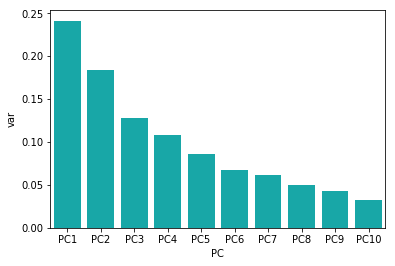

In [25]:
import seaborn as sns
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

A rule of thumb is to choose the threshold right at the "elbow" of this curve. But in this case, we cant really see the elbow. We can do better :)

-  "intrinsic dimension" of the data = ?

Easy plot :)

In [24]:
import numpy as np

In [ ]:
# Cumulative sum of explained_variace_ratio:

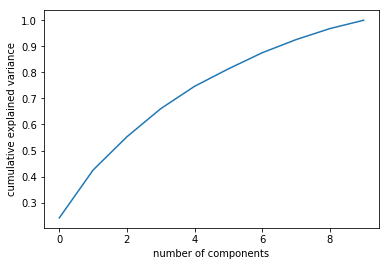

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Fancy plot :D

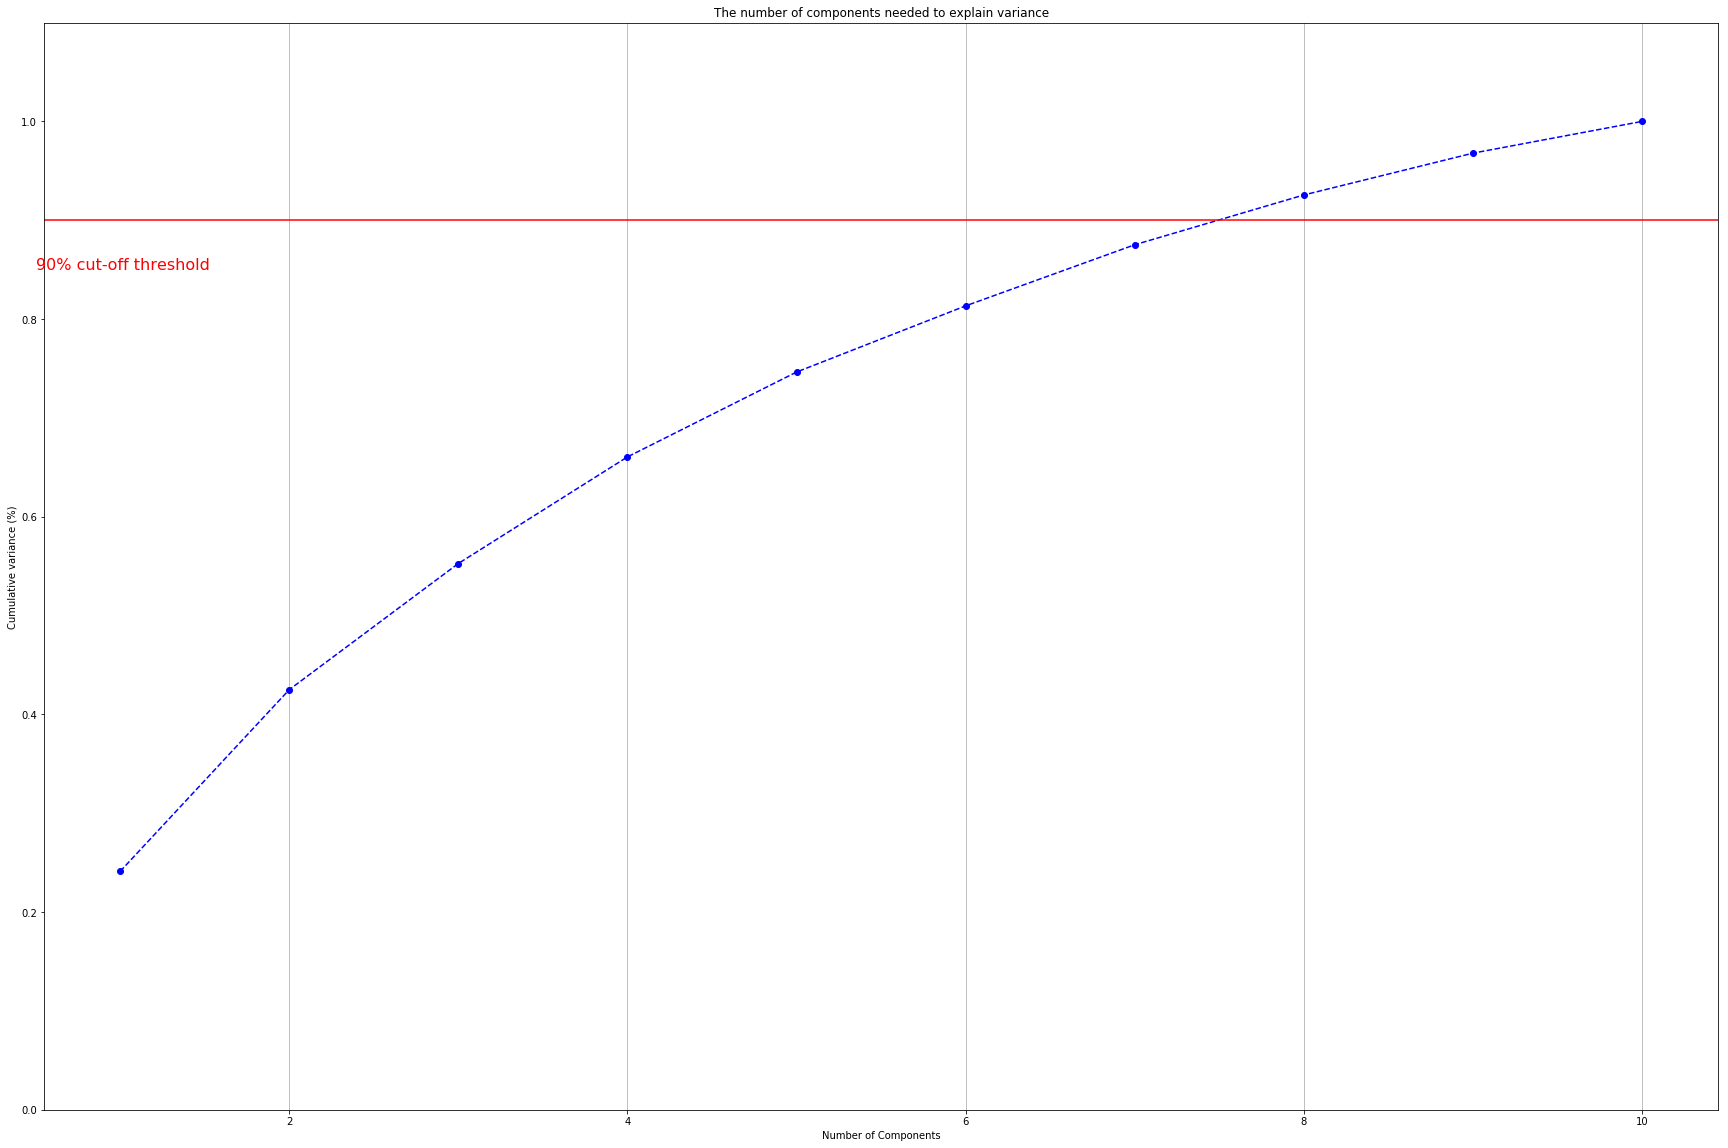

In [26]:

import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [27]:
n_comp = np.arange(0,len(pca.explained_variance_ratio_),1) # create an array 0,1,2...10
np.min(n_comp[np.cumsum(pca.explained_variance_ratio_) > 0.9])

7

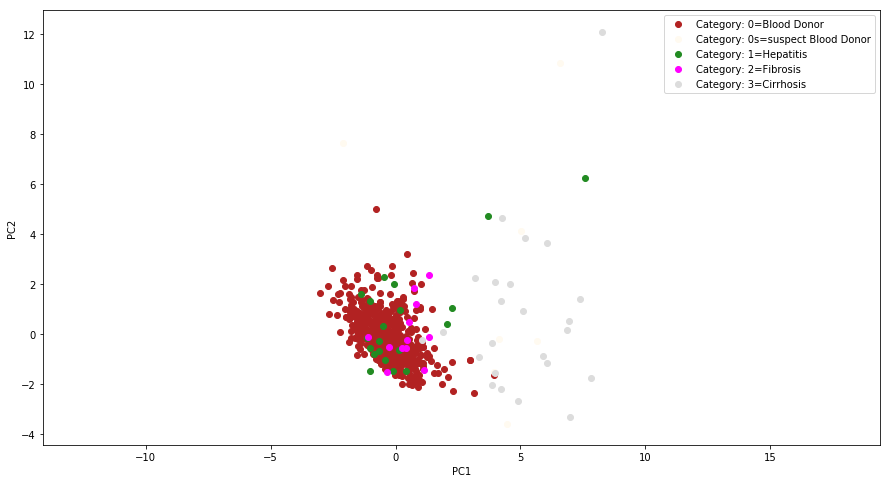

1.1456663679276667e-16


In [28]:

# Transform the scaled samples: pca_features
pca_features = PCA(n_components=7).fit_transform(data_rescaled)
plt.rcParams["figure.figsize"] = (15,8)
# Print the shape of pca_features
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
import matplotlib._color_data as mcd
for i, category in enumerate(np.unique(data_drop.index)):
    plt.scatter(xs[data_drop.Category == category], 
                ys[data_drop.Category == category],
                color=list(mcd.CSS4_COLORS.values())[i+45], label = "Category: {}".format(category)
               )
    plt.axis('equal')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

            You have just "decorrelate" our data! See how small the correlation coefficient!

- We realized something from this plot! Healthy blood donor tend to have coordinate on PC1 around 0, whereas high on PC1 are Cirrhosis, Fibrosis, and Hepatitis! We want to see which variable (markers) that contribute mostly to PC1, thus contribute the most to variance of our data.

# Feature selection

In [29]:
# Let’s find the most important features:

In [41]:
pca.components_

array([[-0.44375344,  0.1529208 , -0.03297578,  0.34171688,  0.34212025,
        -0.44539699, -0.34694618,  0.06846011,  0.30140753, -0.36126252],
       [ 0.09913982,  0.47144669,  0.45361695,  0.29982061,  0.02409179,
         0.26001763,  0.28901209,  0.11024788,  0.51869908,  0.19831209],
       [ 0.39962943, -0.31929128, -0.15174022,  0.41657021,  0.4186448 ,
        -0.12290196, -0.18404975, -0.13891754,  0.0730561 ,  0.54121679],
       [ 0.17399065,  0.22415155, -0.40739158, -0.22636258,  0.11324891,
        -0.062345  , -0.04418254,  0.81068058,  0.07290843,  0.14523246],
       [ 0.12896907, -0.3053289 ,  0.45270078,  0.24595529, -0.42909808,
         0.05367112, -0.51537467,  0.4051252 , -0.06991617, -0.05547728],
       [ 0.21767889,  0.4463538 , -0.22774822, -0.12987692, -0.48555078,
        -0.25935097, -0.41956241, -0.34980277,  0.21341374,  0.19412475],
       [ 0.24361877,  0.3021843 ,  0.50616365, -0.41410111,  0.47474458,
        -0.12433997, -0.28302344, -0.05933428

In [118]:
c = pca.components_[0]
c

array([-0.44375344,  0.1529208 , -0.03297578,  0.34171688,  0.34212025,
       -0.44539699, -0.34694618,  0.06846011,  0.30140753, -0.36126252])

In [119]:
np.where(c[0] == np.amax(abs(pca.components_ )[0]))

(array([], dtype=int64),)

In [120]:
factors = data_drop.columns[3:]
factors

Index(['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

Text(0.5,1,'Contribution of features to PC1 (Dim 1)')

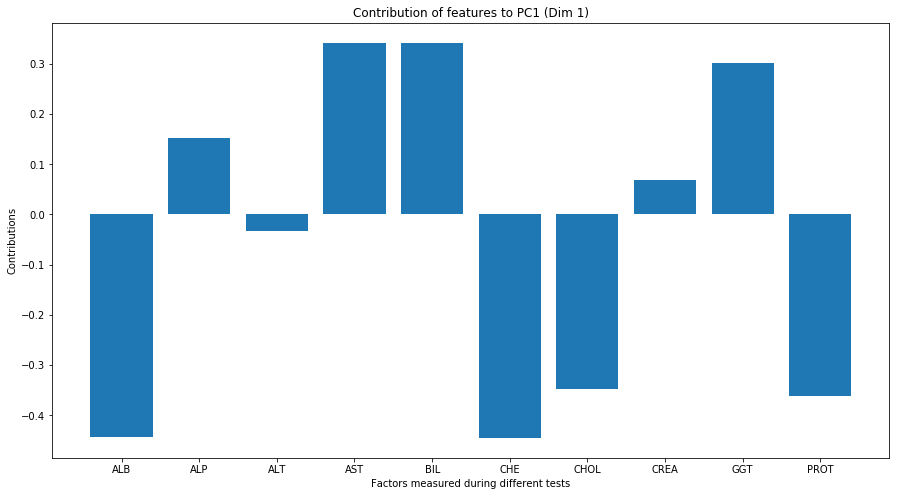

In [122]:
plt.bar(factors,c)
#plt.axhline(y=0.35, color='r', linestyle='-')
plt.xlabel("Factors measured during different tests")
plt.ylabel("Contributions")
plt.title("Contribution of features to PC1 (Dim 1)")

In [123]:
c_ab = abs(pca.components_[0])
c_ab


array([0.44375344, 0.1529208 , 0.03297578, 0.34171688, 0.34212025,
       0.44539699, 0.34694618, 0.06846011, 0.30140753, 0.36126252])

Text(0.5,1,'Contribution of features to PC1 (Dim 1)')

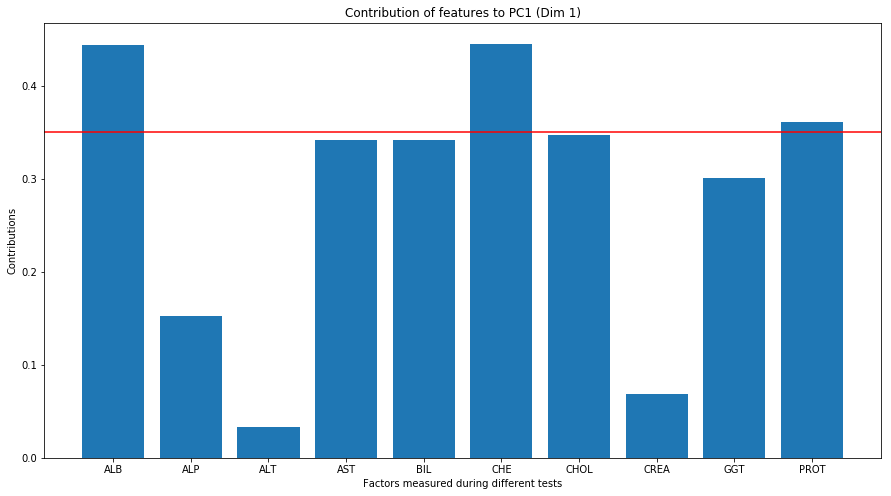

In [124]:
plt.bar(factors,c_ab)
plt.axhline(y=0.35, color='r', linestyle='-')
plt.xlabel("Factors measured during different tests")
plt.ylabel("Contributions")
plt.title("Contribution of features to PC1 (Dim 1)")

We can see quickly it's ALB and CHE. Make sense! Albumin is the most abundant proteins! How about Cholineesterase? We found something interesting without even knowing about it beforehand! I just looked up the internet and yes choline esterase seems to have correlation with liver cirrhosis :) http://www.tropicalgastro.com/articles/35/1/serum-cholinesterase-is-an-excellent.html 

Is that because Albumin the most abundant protein that it contributes to variance of our data? We already do scaling, meaning that all features are normalized to have mean = 0 and std =1, so in fact Albumin contributes to our data variance by its own, not because of its abundancy! We know from a paper "A low albumin level in patients with hepatitis C can be a sign of cirrhosis (advanced liver disease)."
https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-albumin.asp
Cool! You have found something interesting with PCA today! Congratulations!

In [33]:
# mcd.CSS4_COLORS.values()

In order to keep 90 percent of variance, we can use 7 components instead of 11! Now we can transform our data to a new dataset while keeping the essential structures of the data and applying Clustering.

In other example, PCA can be use to visualize the data. In your homework, you may want to try plotting the first 2 components PC1 and PC2 in a 2D graph. Sometimes, the first 2 PCs can account for 98% of variance! Finding those "Intrinsic dimension" can give you locate the main features that contribute to the data trend.
In genomics, for example, compartments A and B (gene-rich: euchromatin and gene-poor: heterochromatin compartments) are discovered by PCA in Hi-C data (sequencing the genomes in 3D interaction space).


In [116]:
np.unique(data_drop.Category)

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

Another important aspect of Dimension Reduction is Visualization. A great technique has widely applied recently is t-SNE ... See you in the next session!

## Additional reading

- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
